In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib as api 
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing()

In [5]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
x_train_full , x_test , y_train_full , y_test = train_test_split(housing.data , housing.target , random_state = 42)
x_train , x_valid , y_train , y_valid = train_test_split(x_train_full , y_train_full , random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
x_train.shape

(11610, 8)

In [10]:
model = keras.models.Sequential([
    keras.layers.Dense(30 , activation = 'relu' , input_shape = [8]),
    keras.layers.Dense(30 , activation = 'relu'),
    keras.layers.Dense(1)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss ='mean_squared_error',
             optimizer = keras.optimizers.SGD(lr=1e-3),
             metrics = ['mae'])

In [13]:
model_history = model.fit(x_train , y_train , epochs = 20 , validation_data = (x_valid , y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 146us/sample - loss: 1.8423 - mae: 0.9996 - val_loss: 5.2165 - val_mae: 0.7085
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6876 - mae: 0.6101 - val_loss: 0.7732 - val_mae: 0.5748
Epoch 3/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5954 - mae: 0.5625 - val_loss: 0.5446 - val_mae: 0.5328
Epoch 4/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5553 - mae: 0.5392 - val_loss: 0.5425 - val_mae: 0.5220
Epoch 5/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5268 - mae: 0.5245 - val_loss: 0.5539 - val_mae: 0.5070
Epoch 6/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.5049 - mae: 0.5124 - val_loss: 0.4701 - val_mae: 0.4929
Epoch 7/20
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4852 - mae: 0.5009 - val_loss: 0.

In [14]:
mae_test = model.evaluate(x_test , y_test)

5160/5160 [==============================] - 0s 22us/sample - loss: 0.3943 - mae: 0.4491


In [15]:
model_history.history

{'loss': [1.8422878422786406,
  0.6876290683803837,
  0.5954174913074517,
  0.5553173896364874,
  0.5268464679763196,
  0.5048545387826224,
  0.4852492377020797,
  0.4705996497040879,
  0.45761859669036437,
  0.44759501153595177,
  0.43882398432847447,
  0.4313068858412809,
  0.42522328599427506,
  0.4198354722917542,
  0.41517822991713277,
  0.4109330989491005,
  0.40728061705391333,
  0.40368935084876884,
  0.40026733138045806,
  0.3974111870021064],
 'mae': [0.9995966,
  0.6101176,
  0.56253254,
  0.5392274,
  0.5244746,
  0.5124248,
  0.5009327,
  0.49341673,
  0.48539588,
  0.4797301,
  0.4747582,
  0.47030392,
  0.46652922,
  0.46359402,
  0.4611386,
  0.45905492,
  0.45671204,
  0.45440185,
  0.45205775,
  0.45057893],
 'val_loss': [5.21652255600429,
  0.7732010998621159,
  0.5446314214273941,
  0.5425261998515413,
  0.5538934211321271,
  0.4700541878547471,
  0.4561706613354597,
  0.44517563385864867,
  0.4405697380002463,
  0.4184946355662605,
  0.4285463937185223,
  0.4071471

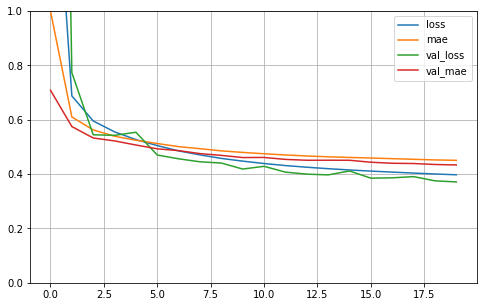

In [16]:
pd.DataFrame(model_history.history).plot(figsize = (8 , 5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [17]:
x_new = x_test[:3]

In [18]:
y_pred = model.predict(x_new)
print(y_pred)
print(y_test[:3])

[[0.527655 ]
 [1.8847213]
 [3.381916 ]]
[0.477   0.458   5.00001]


In [28]:
del model

In [29]:
keras.backend.clear_session()

# Function API

### Not all neural network are simply Sequential.some my have multiple input or multiple output.

In [45]:
input_ = keras.layers.Input(shape = x_train.shape[1:])
hidden1 = keras.layers.Dense(30 , activation = 'relu')(input_)
hidden2 = keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = keras.layers.concatenate([input_ , hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_] , outputs = [output])

In [46]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_7[0][0]              

In [47]:
model.compile(loss='mean_squared_error' , 
             optimizer = keras.optimizers.SGD(lr=1e-3) ,
             metrics = ['mae'])

In [48]:
model_history = model.fit(x_train , y_train , epochs = 20 , validation_data= (x_valid , y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 77us/sample - loss: 1.7828 - mae: 0.9852 - val_loss: 1.7478 - val_mae: 0.6928
Epoch 2/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.7968 - mae: 0.6595 - val_loss: 0.7972 - val_mae: 0.6320
Epoch 3/20
11610/11610 [==============================] - 1s 43us/sample - loss: 0.7196 - mae: 0.6244 - val_loss: 0.6587 - val_mae: 0.5923
Epoch 4/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.6596 - mae: 0.5945 - val_loss: 0.6150 - val_mae: 0.5703
Epoch 5/20
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6123 - mae: 0.5715 - val_loss: 0.5912 - val_mae: 0.5455
Epoch 6/20
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5731 - mae: 0.5510 - val_loss: 0.5170 - val_mae: 0.5234
Epoch 7/20
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5396 - mae: 0.5329 - val_loss: 0.4

In [49]:
mae_test = model.evaluate(x_test , y_test)

5160/5160 [==============================] - 0s 24us/sample - loss: 0.4075 - mae: 0.4599


In [50]:
model.history.history

{'loss': [1.7827931681241997,
  0.7968368115248503,
  0.7196167647068507,
  0.659635011098387,
  0.6123479081268047,
  0.5731249119422233,
  0.5396359697484847,
  0.5132474158469404,
  0.491348795830228,
  0.47496912409579517,
  0.46198802178630943,
  0.45138791207092577,
  0.4431364787256379,
  0.4365296949095812,
  0.4303221785205895,
  0.42615586936114475,
  0.422239924719578,
  0.41641005365936845,
  0.4125186014442378,
  0.4088454777418181],
 'mae': [0.98519963,
  0.6595479,
  0.62438136,
  0.5944544,
  0.5715223,
  0.5509749,
  0.53292394,
  0.5187173,
  0.50693536,
  0.49777687,
  0.4905282,
  0.4848898,
  0.47962865,
  0.47613654,
  0.47337884,
  0.4703608,
  0.46810013,
  0.46474358,
  0.4621675,
  0.46040136],
 'val_loss': [1.747835808822967,
  0.7971727017284364,
  0.6586612014961489,
  0.6150243667207023,
  0.5912145275170181,
  0.5170358085047059,
  0.4928053278331609,
  0.4723637904076613,
  0.4472400626855919,
  0.4357576769143728,
  0.4288552690152974,
  0.4165586538555

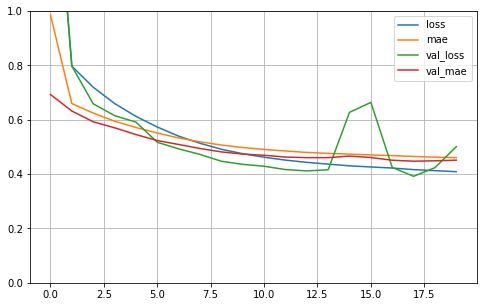

In [51]:
pd.DataFrame(model_history.history).plot(figsize = ( 8 , 5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

## Saving And Restoring

In [52]:
model.save('my_Func_model.hs')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_Func_model.hs\assets


In [53]:
%pwd

'C:\\Users\\ADMIN'

In [54]:
del model

In [55]:
keras.backend.clear_session()

In [56]:
model = keras.models.load_model('my_func_model.hs')

In [57]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_7[0][0]              

In [58]:
y_pred = model.predict(x_new)
print(y_pred)

[[0.6428362]
 [1.8291979]
 [3.5007093]]


## Using Callback during Training

In [82]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30 , activation = 'relu' , input_shape = [8]),
    keras.layers.Dense(30 , activation = 'relu'),
    keras.layers.Dense(1)
])

In [84]:
model.compile(loss = 'mse' , optimizer = keras.optimizers.SGD(lr = 1e-3))

In [94]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Model-{epoch:02d}.h5')

In [95]:
history = model.fit(x_train , y_train , epochs = 10 ,
                   validation_data = (x_valid , y_valid) ,
                   callbacks =[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 84us/sample - loss: 0.6903 - val_loss: 0.9814
Epoch 2/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5981 - val_loss: 0.5847
Epoch 3/10
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5554 - val_loss: 0.5306
Epoch 4/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5274 - val_loss: 0.5004
Epoch 5/10
11610/11610 [==============================] - 0s 43us/sample - loss: 0.5036 - val_loss: 0.5383
Epoch 6/10
11610/11610 [==============================] - 1s 43us/sample - loss: 0.4863 - val_loss: 0.4526
Epoch 7/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4701 - val_loss: 0.4425
Epoch 8/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4580 - val_loss: 0.4322
Epoch 9/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4473 - val_l

In [96]:
del model 
keras.backend.clear_session()

In [106]:
model = keras.models.load_model('Model-10.h5')

In [102]:
mse_test = model.evaluate(x_test , y_test)

5160/5160 [==============================] - 0s 34us/sample - loss: 0.4302


## Best Model 

In [107]:
del model


In [108]:
keras.backend.clear_session()

In [109]:
model = keras.models.Sequential([
    keras.layers.Dense(30  , activation = 'relu' , input_shape = [8]),
    keras.layers.Dense(30 , activation = 'relu'),
    keras.layers.Dense(1)
])

In [110]:
model.compile(loss = 'mse' , optimizer = keras.optimizers.SGD(lr = 1e-3))

In [111]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('Best_Model.h5' , save_best_only = True)

In [112]:
history = model.fit(x_train , y_train , epochs = 10 , 
                   validation_data = (x_valid , y_valid),
                   callbacks = [checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 73us/sample - loss: 2.0065 - val_loss: 1.0664
Epoch 2/10
11610/11610 [==============================] - 1s 43us/sample - loss: 0.7724 - val_loss: 0.7007
Epoch 3/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6726 - val_loss: 0.6150
Epoch 4/10
11610/11610 [==============================] - 0s 43us/sample - loss: 0.6069 - val_loss: 0.5925
Epoch 5/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5578 - val_loss: 0.6410
Epoch 6/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5227 - val_loss: 0.5006
Epoch 7/10
11610/11610 [==============================] - 1s 43us/sample - loss: 0.4911 - val_loss: 0.4876
Epoch 8/10
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4700 - val_loss: 0.4277
Epoch 9/10
11610/11610 [==============================] - 0s 42us/sample - loss: 0.4524 - val_l

In [113]:
model = keras.models.load_model('Best_Model.h5')
mse_test = model.evaluate(x_test , y_test)

5160/5160 [==============================] - 0s 36us/sample - loss: 0.4297


In [114]:
del model 
keras.backend.clear_session()

In [115]:
model = keras.models.Sequential([
    keras.layers.Dense(30 , activation = 'relu' , input_shape = [8]),
    keras.layers.Dense(30 , activation = 'relu'),
    keras.layers.Dense(1)
])

In [116]:
model.compile(loss = 'mse' , optimizer = keras.optimizers.SGD(lr = 1e-3)) 

In [118]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('early_stop_model.h5' , save_best_only = True)

In [119]:
early_stopping = keras.callbacks.EarlyStopping(patience = 10 ,
                                              restore_best_weights = True)

In [120]:
history = model.fit(x_train , y_train , epochs = 200 ,
                   validation_data = (x_valid , y_valid) , 
                   callbacks = [checkpoint_cb , early_stopping])

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 74us/sample - loss: 1.5119 - val_loss: 1.9196
Epoch 2/200
11610/11610 [==============================] - 1s 44us/sample - loss: 0.6773 - val_loss: 0.7131
Epoch 3/200
11610/11610 [==============================] - 1s 44us/sample - loss: 0.6166 - val_loss: 0.5757
Epoch 4/200
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5767 - val_loss: 0.5415
Epoch 5/200
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5446 - val_loss: 0.5190
Epoch 6/200
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5184 - val_loss: 0.4859
Epoch 7/200
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4963 - val_loss: 0.4646
Epoch 8/200
11610/11610 [==============================] - 1s 44us/sample - loss: 0.4783 - val_loss: 0.4437
Epoch 9/200
11610/11610 [==============================] - 1s 44us/sample - loss: 0.463

In [121]:
model = keras.models.load_model('early_stop_model.h5')
mse_test = model.evaluate(x_test , y_test)

5160/5160 [==============================] - 0s 34us/sample - loss: 0.3586
